In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


### Importing required Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset & Basic check

In [3]:
df = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Observation**
- dependent feature is 'Life expectancy'
- there is no id column in data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Observation**
- 21 independent features
- 2938 entries/ samples
- Alcohol,Hepatitis B, BMI, Polio, Total expenditure, Diphtheria,GDP,Population,thinness 1-19 years, thinness 5-9 years,  Income composition of resources, Schooling, has missing values
- There are Catagorical & Numerical feature.

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2938,193,Afghanistan,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2938.0,NaN,NaN,NaN,2007.51872,4.613841,2000.0,2004.0,2008.0,2012.0,2015.0
Status,2938,2,Developing,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,2928.0,NaN,NaN,NaN,69.224932,9.523867,36.3,63.1,72.1,75.7,89.0
Adult Mortality,2928.0,NaN,NaN,NaN,164.796448,124.292079,1.0,74.0,144.0,228.0,723.0
infant deaths,2938.0,NaN,NaN,NaN,30.303948,117.926501,0.0,0.0,3.0,22.0,1800.0
Alcohol,2744.0,NaN,NaN,NaN,4.602861,4.052413,0.01,0.8775,3.755,7.7025,17.87
percentage expenditure,2938.0,NaN,NaN,NaN,738.251295,1987.914858,0.0,4.685343,64.912906,441.534144,19479.91161
Hepatitis B,2385.0,NaN,NaN,NaN,80.940461,25.070016,1.0,77.0,92.0,97.0,99.0
Measles,2938.0,NaN,NaN,NaN,2419.59224,11467.272489,0.0,0.0,17.0,360.25,212183.0


**Observation**
- there are more Developing conturies then Developed. (In gereral there are 195 countries, out of which, 37 are developed(19%))
- Column names have spaces in the end, need to rename it by removing spaces.


In [7]:
# removing unwanted spaces from Column names
df= df.rename(columns=lambda x: x.strip())

### finding catagorical & numerical eatures

In [8]:
cat_feature = [feature for feature in df.columns if df[feature].dtypes=='O']

In [9]:
num_feature = list(df.drop(cat_feature, axis=1).columns)
print(num_feature)

['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [10]:
# Check for any Descrete Numerical Features
df[num_feature].columns[df[num_feature].apply(lambda x:len(pd.unique(x)))<=5]

Index([], dtype='object')

**Observation**
- there are no Descrete Numerical features

### Analyse Catagorical Features

In [11]:
df.Country.nunique()    

193

**Observation**
- Country fature has too many unique values for catagorical feature, i.e it has High cardinality

#### Analyse rest of Catagorical Features

<AxesSubplot:xlabel='Status', ylabel='count'>

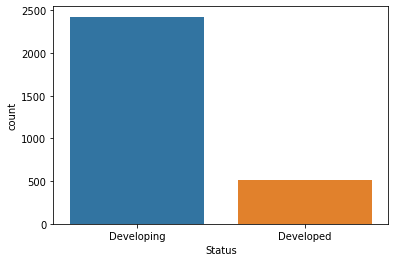

In [12]:
sns.countplot(x='Status', data=df)

**Observation**
- Developing countries are more in samples

### Analyse Numerical Features

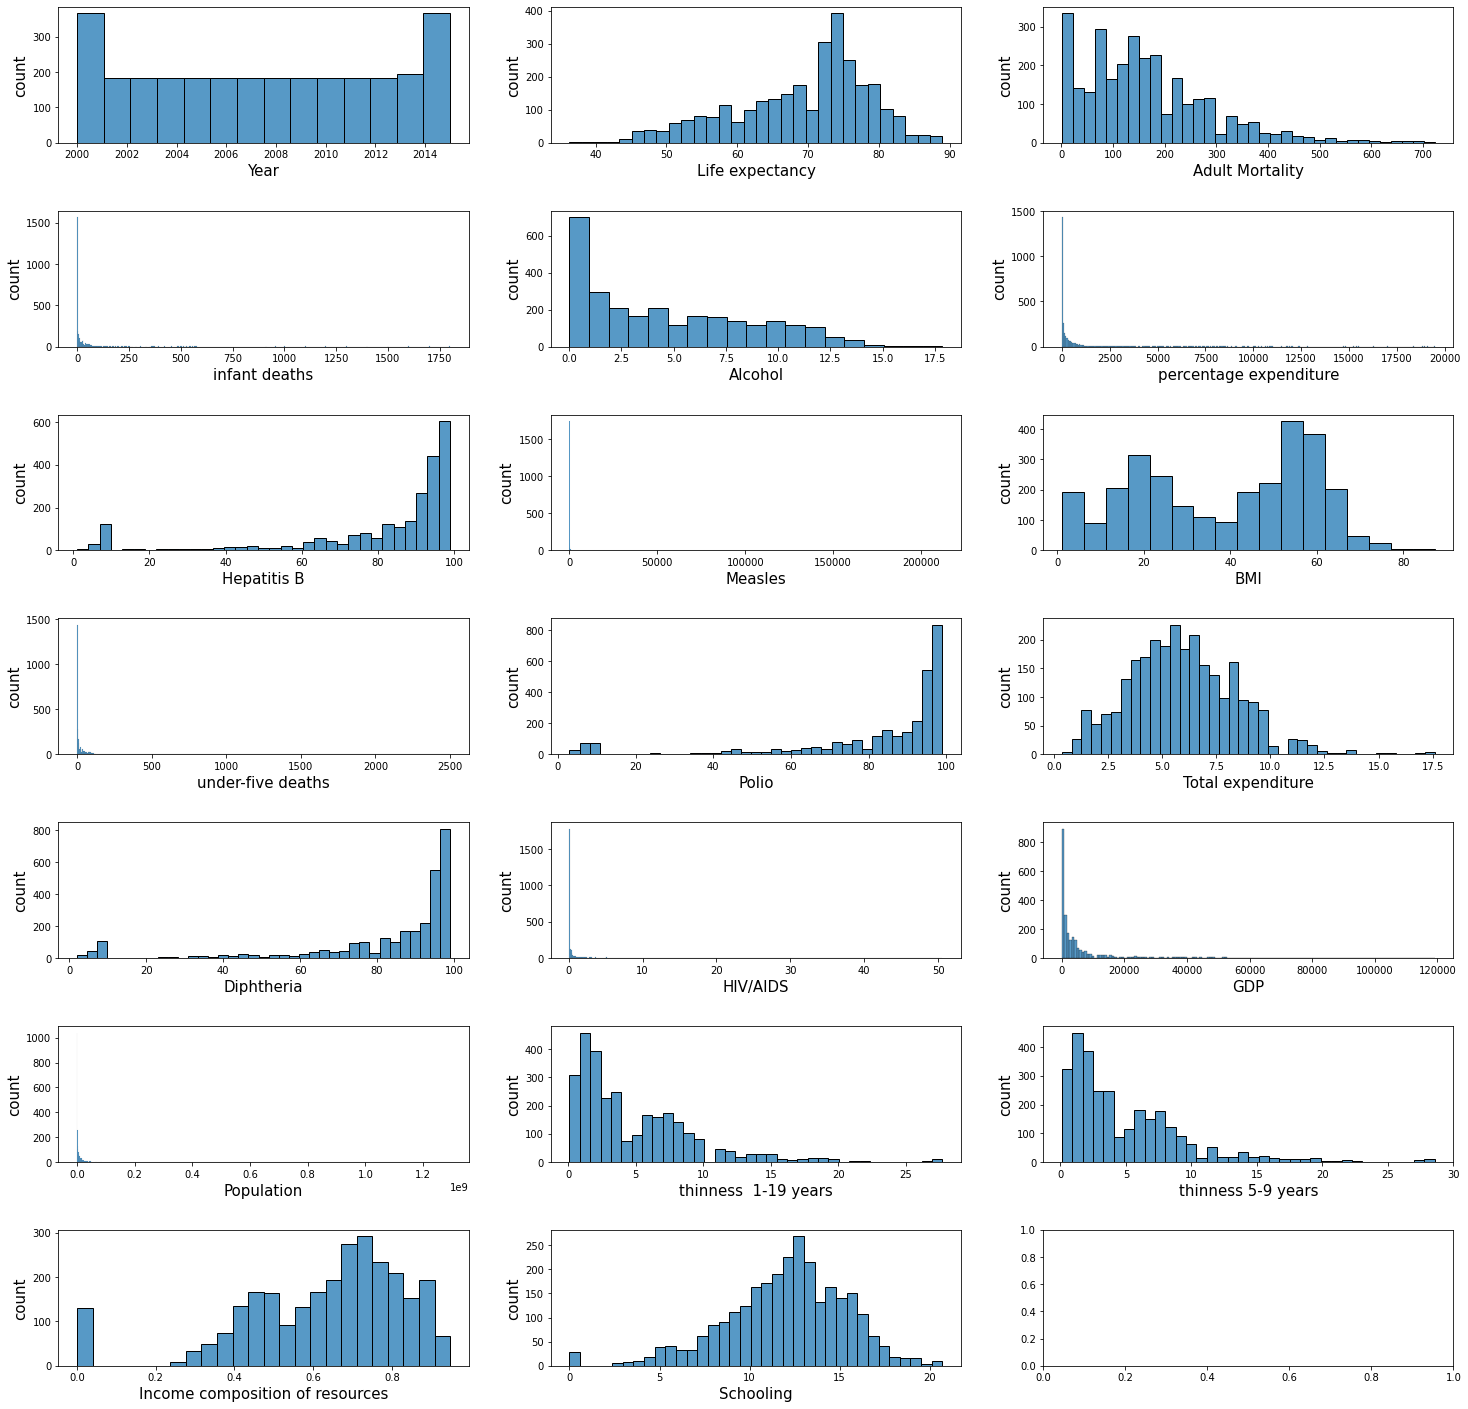

In [13]:
# Plot all numeric features in a Subplots
fig, axs = plt.subplots(7,3, figsize=(25,25))
plt.subplots_adjust(hspace=0.5)
for c, feature in enumerate(num_feature):
    a= sns.histplot(x=feature, data=df, ax=axs.flat[c],)
    a.set_xlabel(feature,fontsize=15)
    a.set_ylabel('count',fontsize=15)   

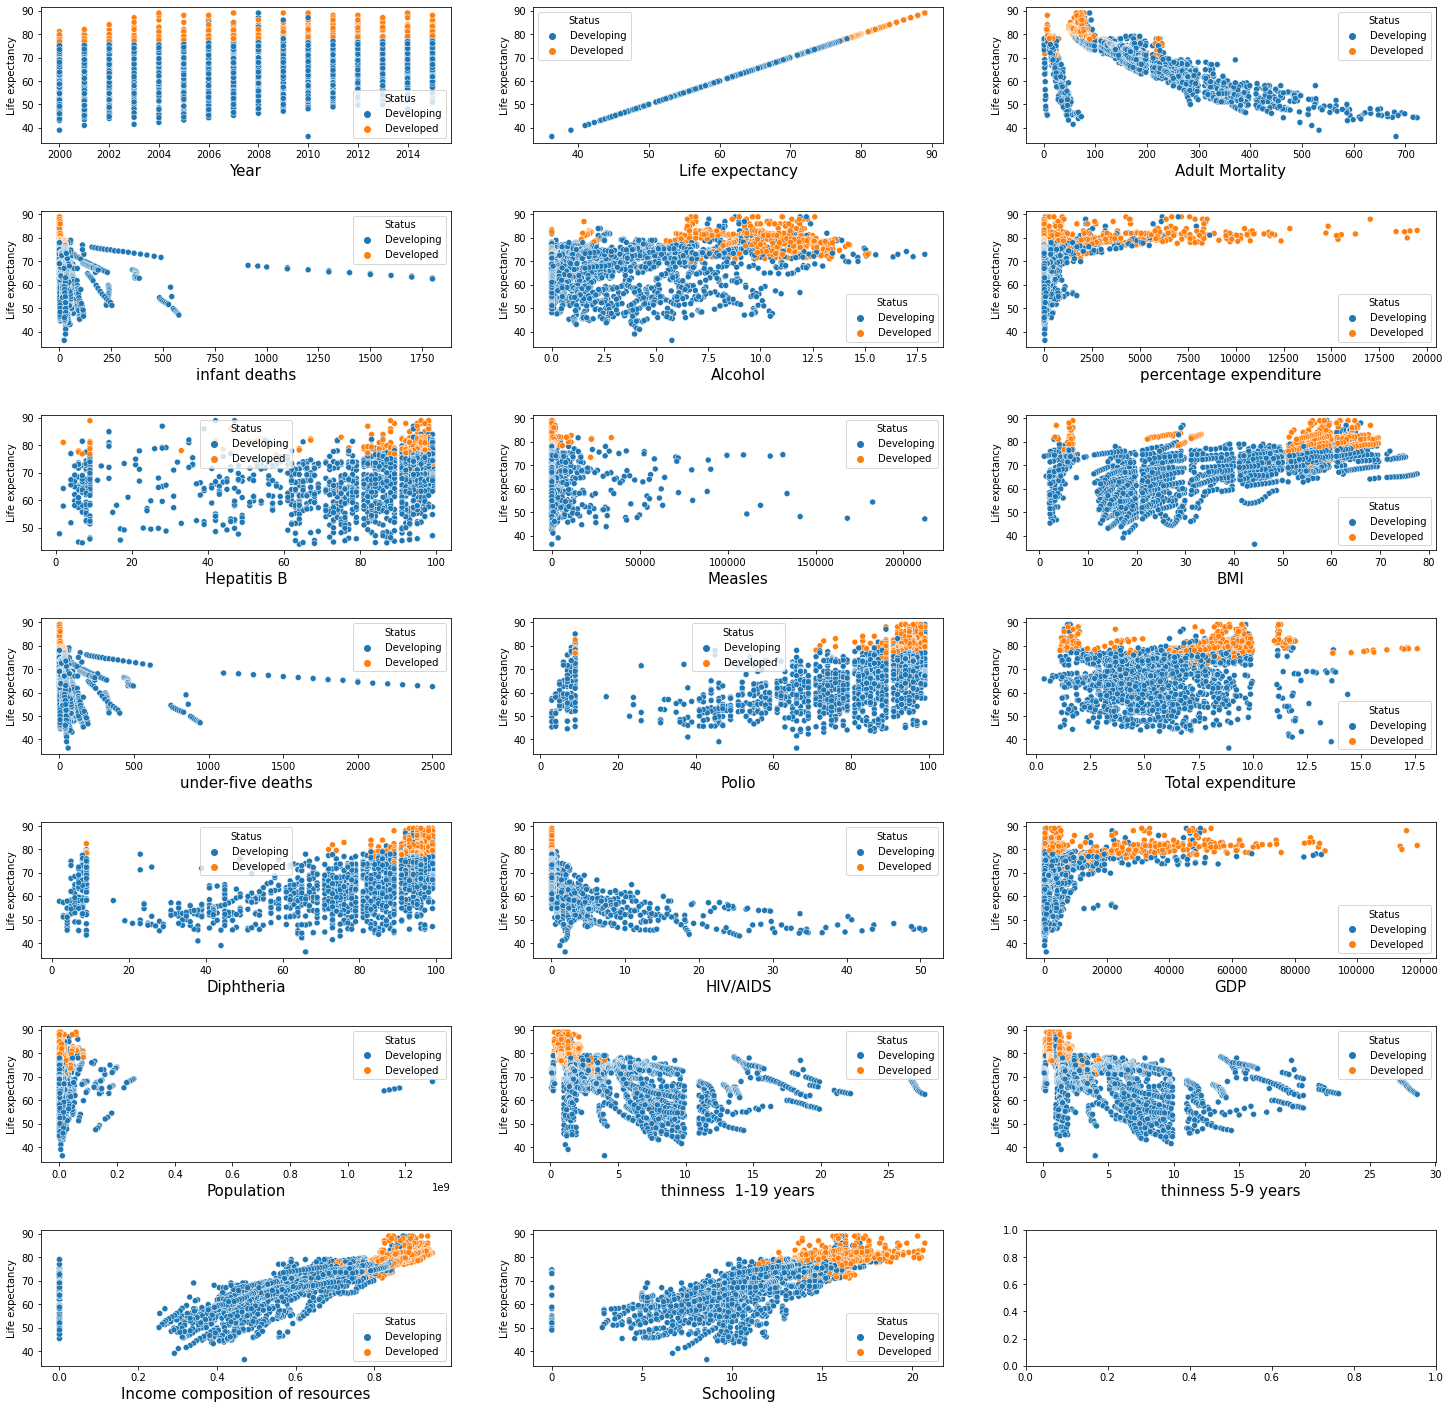

In [14]:
# Numerical featues against Life_Expetancy
fig, axs = plt.subplots(7,3, figsize=(25,25))
plt.subplots_adjust(hspace=0.5)
for c, feature in enumerate(num_feature):
    a = sns.scatterplot(x=feature, y='Life expectancy', data=df, ax = axs.flat[c], hue='Status')
    a.set_xlabel(feature,fontsize=15)

**Observation**
- Life Expectancy of developed is higher.
- Year - from 2000 to 2015, there no much change in Life Expectancy, its same all years
- Adult Mortality - 
    - 0-100 - LE is varying all over range
    - above 100, LE is dropping down as adult mortality increases, i.e Negative corelation with LE
- infant deaths-
    - very less in Developed countries.
    - Developed countries even with some infant mortality have high LE
    - in some ranges, increase in value shows drop in LE
- Alcohol-
    - No significant impact on LE
    - some areas high value shows high LE, which is less likely to happen
    - developed countries are not impacted by high alcohol , LE still on higher side
- percentage expenditure-
    - high PE shows some increase in LE, reasonably looks true relation
- Hepatitis B-
    - LE is spread low to high over hepatits B, no Significant relation observable
- Measeles-
    - No Significant relation observable
- BMI-
    - Higher BMI shows better LE
- under-five deaths-
    - same as Infant Deaths
- Polio-
    - Higher Polio shows better LE
- Total expenditure
    - No Significant relation observable
- Diphtheria-
    - within range of 20 - 50 LE is low, after that no signinficant difference
- HIV/AIDS-
    - Higher HIV shows lower LE, expected.
- GDP - 
    - Higher GDP shows higher LE, as expexted
- Population-
    - higher Population shows Higher LE, Need to investigate more.
- thinness-
    - increase in thinnes shows lower LE
- Income composition of resources-
    - increaseing vlaue shows increase in LE
- Schooling-
    - increaseing vlaue shows increase in LE

**Overall Observaiton with respect to LE**
- Feature with Highr relation-
    - status, Adult Mortality, percentage expenditure,HIV,GDP,schooling, Income composition of resources
- moderatly realtion - 
    - BMI, infant Death, under-five death
- less or No relation - 
    - Polio,Total expenditure, Diptheria,Population, Measles 

In [15]:
df.corr()['Life expectancy'].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
BMI                                0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.471584
thinness  1-19 years              -0.477183
HIV/AIDS                          -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy, dtype: float64

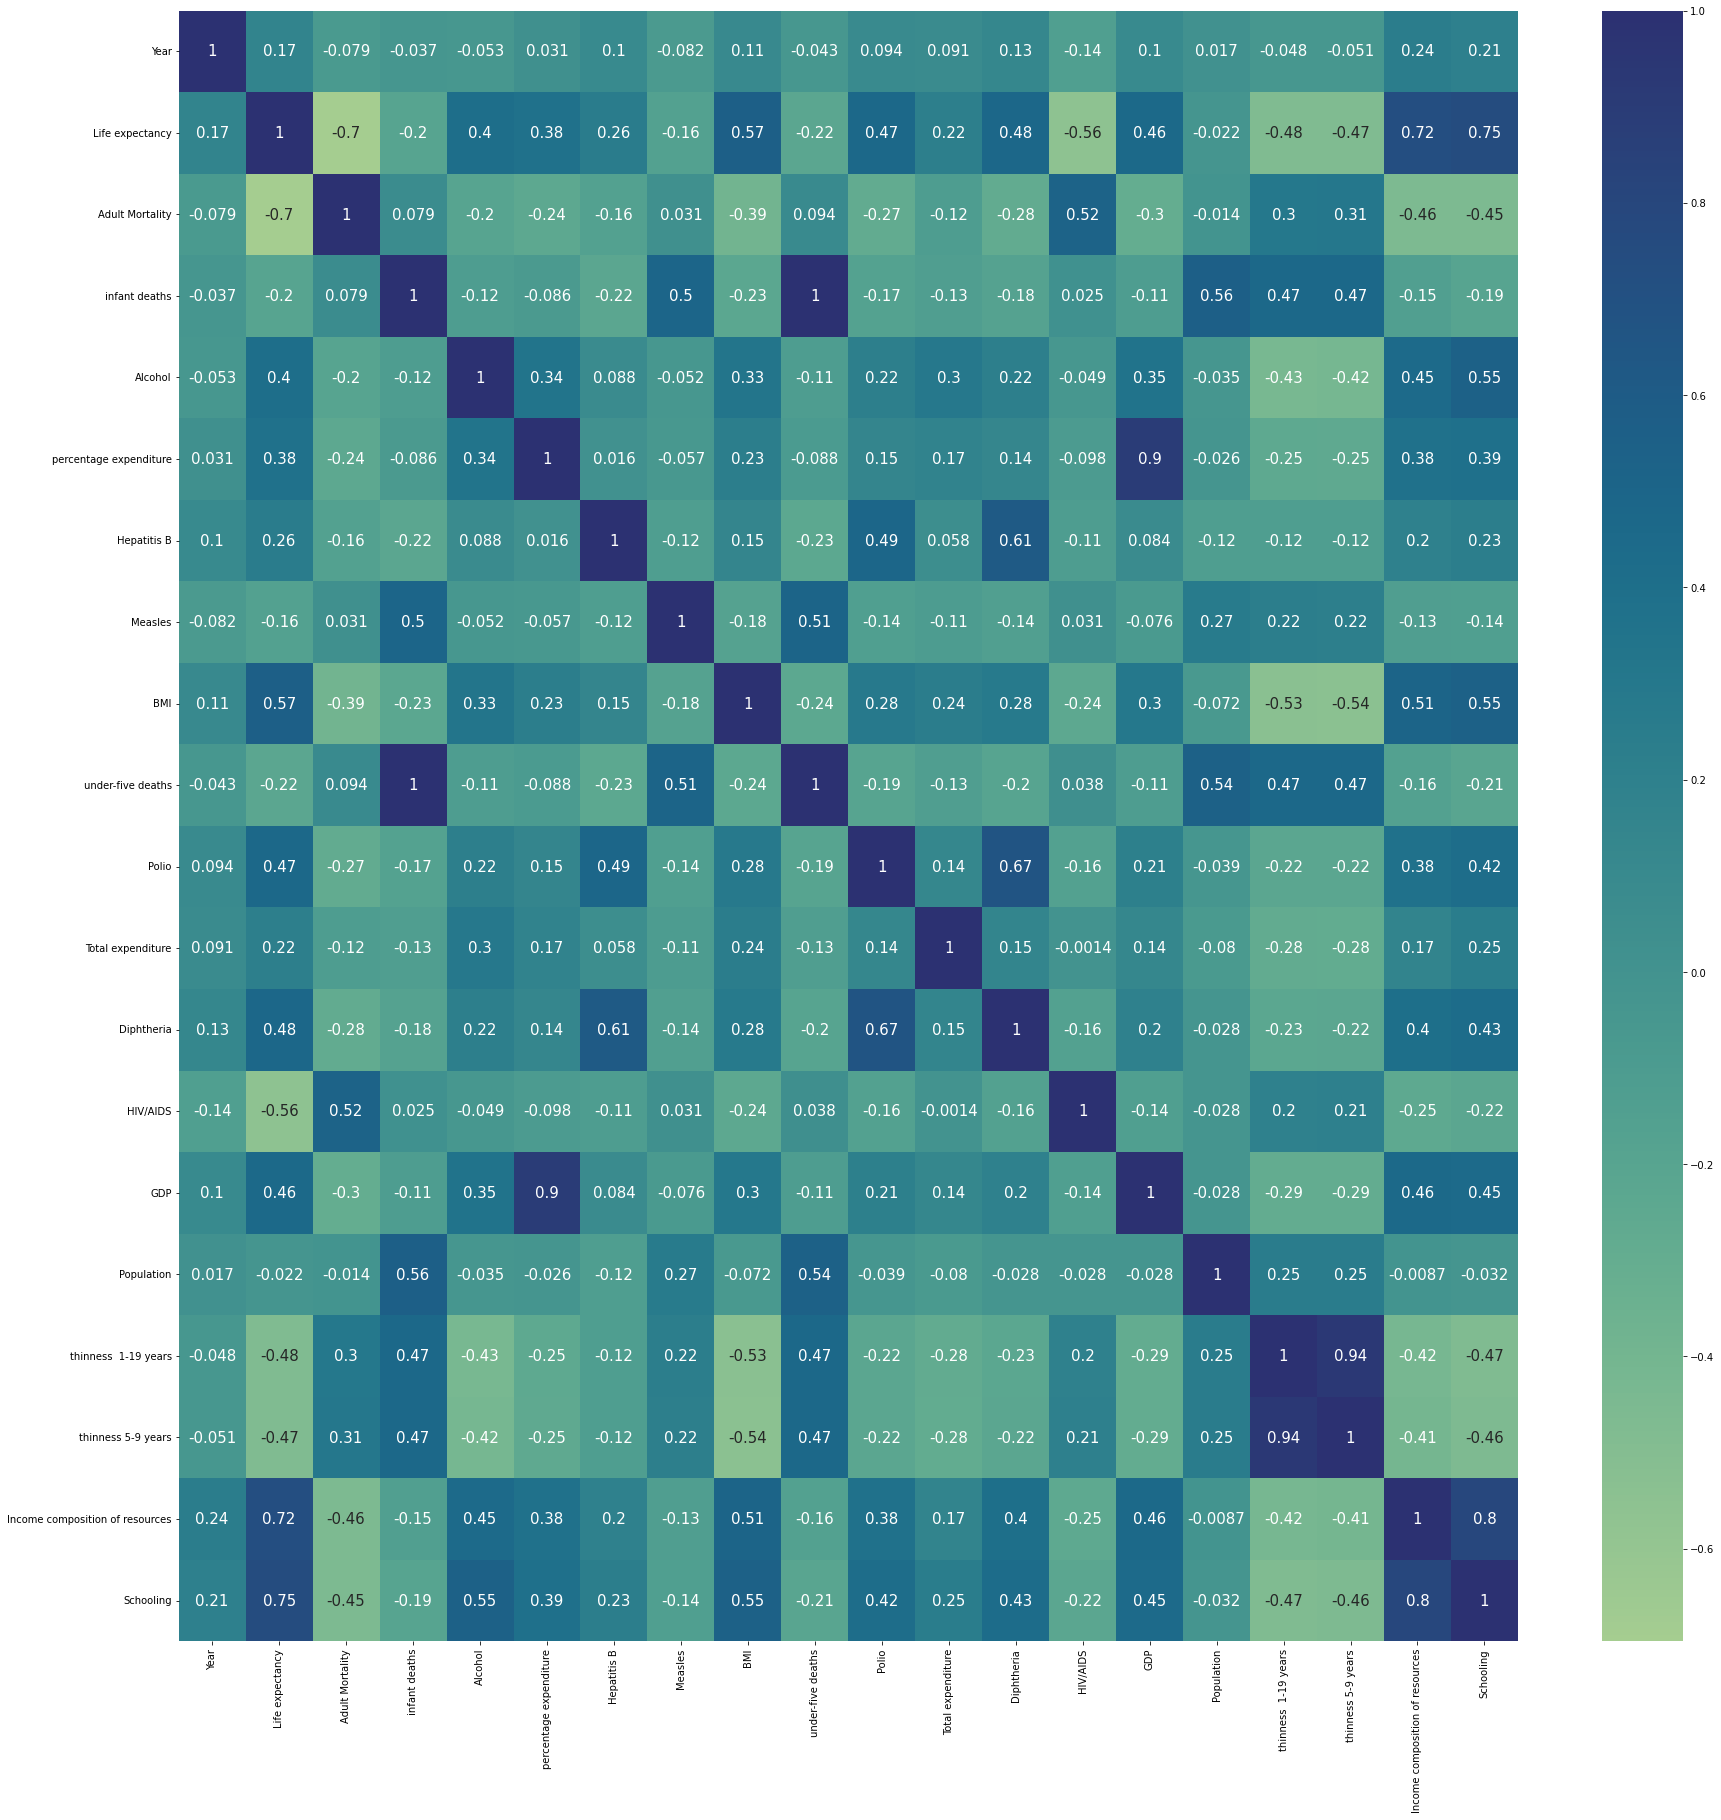

In [16]:
# Confirming above observatin with correlaion
plt.figure(figsize=(30,30))
a =sns.heatmap(df.corr(),annot=True, cmap='crest', annot_kws={'size':15},square=False)

**Observation inter feature correlation**
- Measels & infant death are correlated(0.5), Means mose infants died due to measels
- BMI -> Alcohol(0.33), More alchol causes higher BMI.
- under five & infant deaths (1), both are similer, one can be dropped
- Polio-> HepatitisB (0.49)
- Diptheria-> HepatitisB (0.61)
- Diptheria-> Polio (0.67)
- HIV -> Adult Mortality (0.52), many adults died due to HIV
- GDP -> percentage Expenditure (0.9)
- population -> infant deaths(0.56)
- thinness -> infant deaths(0.47)
- Both thiness have 1 correlation, one can be dropped
- Income composition of resources-> schooling(0.8), ->GDP(0.46),->alochol(0.45), ->BMI(0.51), -> diptheria(0.4), thinness(-0.4)
- Schooling->AdultM(-0.45), ->Alcohol(0.55), ->BMI(0.55), ->Polio(0.42), ->Diptheria(0.43), ->GDP(0.45), ->thiness(-.45)

In [17]:
# LE in High densly populated countries
country_high_population = ['China', 'Monaco', 'Singapore','Bahrain', 'Malta', 'Maldives','Bangladesh']
for country in country_high_population:
    print(country,'-->','%.2f'%(df[df.Country==country]['Life expectancy'].mean()))

China --> 74.26
Monaco --> nan
Singapore --> 81.48
Bahrain --> 75.73
Malta --> 80.36
Maldives --> 75.54
Bangladesh --> 69.30


#### **Questions & Answers--**
1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
    - *status, Adult Mortality, percentage expenditure,HIV,GDP,schooling, Income composition of resources*
2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
3. How does Infant and Adult mortality rates affect life expectancy?
    - *LE is is inversly propotional to Adult mortality*
    - *LE do not have much relation with infant death*
4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
    - *LE is high with high BMI, which shows costly eating habits*
    - *LE is inversly related to thiness, which shows lower eating habits results in lower LE*
    - *LE is high in developed countries, lifestyle is gererally higher in developed countries.*
    - *No feature showing exercise*
    - *LE is positiveley correlated to drinking alcohol*
5. What is the impact of schooling on the lifespan of humans?
    - *Schooling improves lifespan of humans*
6. Does Life Expectancy have positive or negative relationship with drinking alcohol?
    - *drinking alcohol is positively correlated to LE*
7. Do densely populated countries tend to have lower life expectancy?
    - *False, Densely Puplated countries have higher LE*
8. What is the impact of Immunization coverage on life Expectancy?
    - *considering Polio as immunization process, we can observe that with in increase in polio immunization we LE is inreasing in countries.*